In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests

In [2]:
# Connect to database
conn = sqlite3.connect('''database.sqlite''')

# Create cursor object
cur = conn.cursor()

In [3]:
# View Matches dataframe

cur.execute('''SELECT * FROM Matches;''')
Matches_df =pd.DataFrame(cur.fetchall())
Matches_df.columns = [x[0] for x in cur.description]
Matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [4]:
# View Teams dataframe

cur.execute('''SELECT * FROM Teams;''')
Teams_df = pd.DataFrame(cur.fetchall())
Teams_df.columns = [x[0] for x in cur.description]
Teams_df.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [5]:
# View Teams_in_Matches dataframe

cur.execute('''SELECT * FROM Teams_in_Matches;''')
Teams_in_Matches_df = pd.DataFrame(cur.fetchall())
Teams_in_Matches_df.columns = [x[0] for x in cur.description]
Teams_in_Matches_df.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [6]:
# View Unique_Teams dataframe

cur.execute('''SELECT * FROM Unique_Teams;''')
Unique_Teams_df = pd.DataFrame(cur.fetchall())
Unique_Teams_df.columns = [x[0] for x in cur.description]
Unique_Teams_df.head()

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [7]:
Unique_Teams_df.shape

(128, 2)

In [8]:
Matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [9]:
# Create a dataframe that shows the number of wins, draws and loses for each team during the 2011 season

cur.execute('''SELECT HomeTeam AS TeamName, (HomeGoalCount + AwayGoalCount) AS TotalGoals, (WinsH+WinsA) AS Wins, (DrawsH+DrawsA) AS Draws, (LosesH+LosesA) AS Loses
FROM (
SELECT HomeTeam, 
SUM(FTHG) AS HomeGoalCount,
SUM(CASE FTR
    WHEN 'H' THEN 1
    WHEN 'D' THEN 0
    WHEN 'A' THEN 0
END) AS WinsH,
SUM(CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 1
    WHEN 'A' THEN 0
END) AS DrawsH,
SUM (CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 0
    WHEN 'A' THEN 1
END) AS LosesH
FROM Matches
WHERE Season = '2011'
GROUP BY HomeTeam) AS t1
JOIN
(SELECT AwayTeam,
SUM(FTAG) As AwayGoalCount,
SUM(CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 0
    WHEN 'A' THEN 1
END) AS WinsA,
SUM(CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 1
    WHEN 'A' THEN 0
END) AS DrawsA,
SUM (CASE FTR
    WHEN 'H' THEN 1
    WHEN 'D' THEN 0
    WHEN 'A' THEN 0
END) AS LosesA
FROM Matches
WHERE Season = '2011'
GROUP BY AwayTeam) AS t2
ON
t1.HomeTeam = t2.AwayTeam;''')
Stats_df = pd.DataFrame(cur.fetchall())
Stats_df.columns = [x[0] for x in cur.description]
Stats_df.head()

,TeamName,TotalGoals,Wins,Draws,Loses
0,Aachen,30,6,13,15
1,Arsenal,74,21,7,10
2,Aston Villa,37,7,17,14
3,Augsburg,36,8,14,12
4,Bayern Munich,77,23,4,7


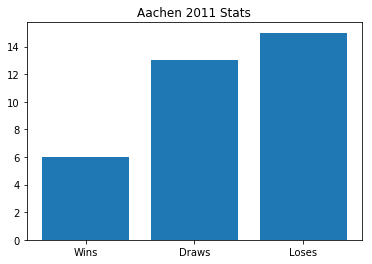

In [10]:
# Create histogram for each teams Wins, Draws and Loses

data = Stats_df.iloc[0].to_dict()
xaxis = list(data.keys())[2:]
y_values = list(data.values())[2:]

plt.bar(xaxis, y_values)
plt.title(list(data.values())[0] + ' 2011 Stats')
plt.show()

# DarkSky API

In [11]:
# View Matches dataframe

cur.execute('''SELECT * FROM Matches WHERE Season = '2011';''')
Matches_2011_df =pd.DataFrame(cur.fetchall())
Matches_2011_df.columns = [x[0] for x in cur.description]
Matches_2011_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [ ]:
Matches_2011_df = Matches_2011_df[:10]
Matches_2011_df

In [12]:
Matches_2011_df['icon'] = 0
Matches_2011_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,0
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D,0
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A,0
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,0
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,0


In [13]:
# Creat function to pull api from json file

def get_key(path):
    with open(path) as f:
        return json.load(f)
    

In [14]:
# Run function to get api key from json file and store under variable api_key

key = get_key("/Users/erikadauria/Flatiron/Projects/Soccer_in_the_Rain/.secret/darksky_api.json")
api_key = key['api_key']

In [15]:
latitude = "/52.520008,"
longitude = "13.404954,"

url = 'https://api.darksky.net/forecast/'

for i in range(len(Matches_2011_df)):
    time = Matches_2011_df.Date[i]+'T12:00:00'
    response = requests.get(url+api_key+latitude+longitude+time+'?exclude=minutely,hourly,currently,flags')
    Matches_2011_df.icon[i]=response.json()['daily']['data'][0]['icon']

/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/erikadauria/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


KeyError: 'daily'

In [25]:
Matches_2011_df[:980]

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,rain
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D,partly-cloudy-day
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A,partly-cloudy-day
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,rain
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,rain


In [53]:
new_Matches = Matches_2011_df[:955]

In [49]:
new_Matches.tail()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon
950,44833,E0,2011,2012-04-21,Bolton,Swansea,1,1,D,no rain
951,44834,E0,2011,2012-04-21,Fulham,Wigan,2,1,H,no rain
952,44835,E0,2011,2012-04-21,Newcastle,Stoke,3,0,H,no rain
953,44836,E0,2011,2012-04-21,QPR,Tottenham,1,0,H,no rain
954,44837,E0,2011,2012-04-22,Liverpool,West Brom,0,1,A,no rain


# Trying to tie it all together

In [100]:
new_Matches = new_Matches[new_Matches['icon'] == 'rain'].reset_index()
new_Matches.head()

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon,Wins
0,0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,0
1,5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,rain,0
2,8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,rain,0
3,9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,rain,0
4,12,1104,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,rain,0


In [101]:
set(new_Matches['HomeTeam'])  == set(new_Matches['AwayTeam'])

True

In [102]:
teams = set(new_Matches['HomeTeam'])

In [142]:
rain_dict = {}
for team in teams:
    total = 0
    wins = 0
    for i in range(len(new_Matches)):
        if (new_Matches['HomeTeam'][i] == team):
            total += 1
            if new_Matches['FTR'][i] == 'H':
                wins += 1
        elif new_Matches['AwayTeam'][i] == team:
            total +=1
            if new_Matches['FTR'][i] == 'A':
                wins += 1
    win_percent = round((wins/total)*100,2)
    rain_dict.update({team: win_percent})

In [148]:
new_df = pd.DataFrame.from_dict(rain_dict, orient='index').reset_index()
new_df.columns = ['TeamName', 'RainWinPercentage']

In [149]:
new_df.head()

,TeamName,RainWinPercentage
0,Hannover,41.67
1,Blackburn,10.00
2,Man United,78.57
3,Paderborn,50.00
4,Fortuna Dusseldorf,38.46


In [150]:
Stats_df.head()

,TeamName,TotalGoals,Wins,Draws,Loses
0,Aachen,30,6,13,15
1,Arsenal,74,21,7,10
2,Aston Villa,37,7,17,14
3,Augsburg,36,8,14,12
4,Bayern Munich,77,23,4,7


In [151]:
final_df = pd.merge(Stats_df, new_df, on='TeamName')

In [152]:
final_df.head()

,TeamName,TotalGoals,Wins,Draws,Loses,RainWinPercentage
0,Aachen,30,6,13,15,23.08
1,Arsenal,74,21,7,10,61.54
2,Aston Villa,37,7,17,14,20.00
3,Augsburg,36,8,14,12,36.36
4,Bayern Munich,77,23,4,7,72.73
